In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Train an SVM for detecting whether a word belongs to English or Spanish.

a.  Build training and test data sets. You can use the most frequent words in http://
en.wiktionary.org/wiki/Wiktionary:Frequency_lists. Consider words at least 4
characters long and ignore accents.

## 2. Digit recognition model understanding.
(a) Get the data for the MNIST data set: https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html.

In [ ]:

# Carga los datos de MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(b) Normalize your features so that each one has mean 0 and standard deviation 1.

In [ ]:


# Crea el normalizador
scaler = StandardScaler()

# Ajusta el normalizador a los datos de entrenamiento y luego transforma los datos de entrenamiento
X = scaler.fit_transform(X)



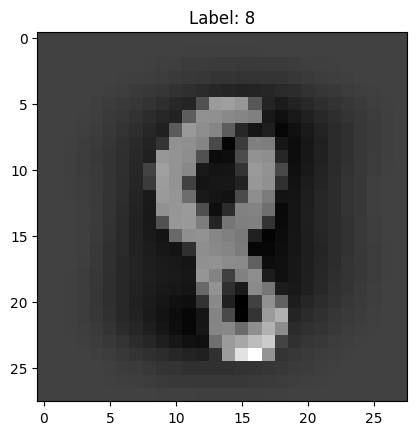

In [ ]:
index = np.random.randint(X.shape[0])
image = X[index].reshape(28, 28)

# Muestra la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Label: {y[index]}')
plt.show()

(c) Choose two classes (e.g. 1 and 0, or 6 and 9) and train a linear SVM to discriminate between them. Find an optimal complexity parameter, C, plotting the training and test error vs. the regularization parameter. Use a logarithmic scale for C,
{
$2^{-15}$
, $2^{-14}$
, . . . , $2^{10}$}

In [ ]:
# Filtrar los datos para seleccionar solo las clases 1 y 0
X_filtered = X[(y == '0') | (y == '1')]
y_filtered = y[(y == '0') | (y == '1')]

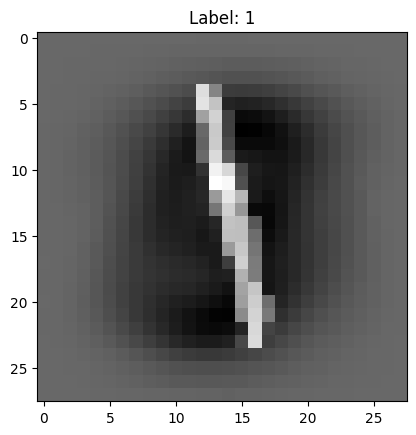

In [ ]:
index = np.random.randint(X_filtered.shape[0])
image = X_filtered[index].reshape(28, 28)

# Muestra la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Label: {y_filtered[index]}')
plt.show()

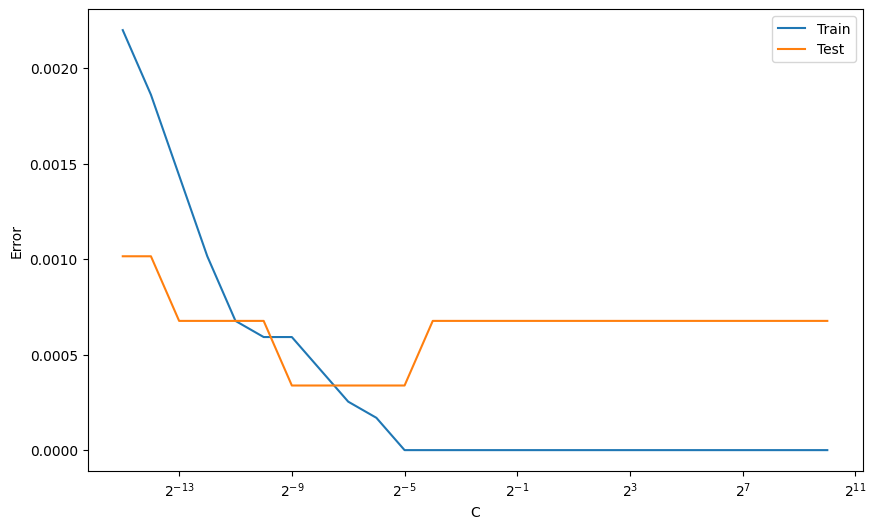

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Inicializar las listas para almacenar los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Definir los valores de C para la búsqueda en la cuadrícula
C_values = [2**i for i in range(-15, 11)]

# Realizar la búsqueda en la cuadrícula
for C in C_values:
    # Entrenar el SVM
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    # Calcular el error de entrenamiento y prueba
    train_error = zero_one_loss(y_train, clf.predict(X_train))
    test_error = zero_one_loss(y_test, clf.predict(X_test))

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar el error de entrenamiento y prueba en función de C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Train')
plt.plot(C_values, test_errors, label='Test')
plt.xscale('log', base=2)
plt.xlabel('C')
plt.ylabel('Error')
plt.legend()
plt.show()

(d) Extract the weights of the classification model found in (b).

In [ ]:
clf = svm.SVC(kernel='linear', C=2**-15)
clf.fit(X_train, y_train)
# Extract the weights of the model
weights = clf.coef_

print(weights)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.03817303e-20 -6.16745865e-21 -1.13820052e-20 -1.13820052e-20
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.27765775e-21  2.43521972e-20 -6.35274710e-22  3.91752738e-20
  -6.12510700e-20  4.03399441e-20  7.55976905e-20  6.67038446e-21
   6.77626358e-21  1.35737030e-19  4.98565495e-04  8.50562194e-04
  -1.15668263e-03 -6.78026492e-04  1.70888897e-19  1.89100105e-19
   1.08631975e-19  1.23349173e-20 -5.71482542e-20  3.86458782e-21
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.44971132e-21 -3.67929936e-21
  -1.01114

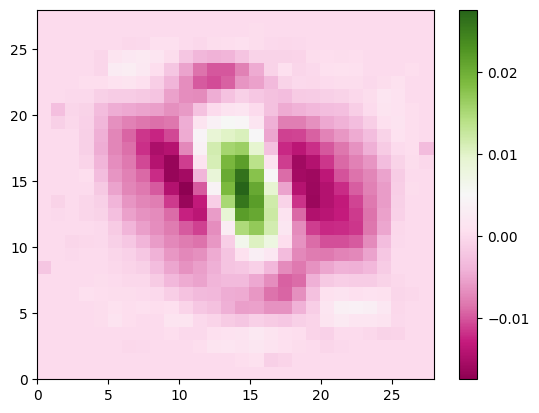

In [ ]:
weights_matrix = weights.reshape(28, 28)

# Create a new figure
plt.figure()

# Use pcolor to produce a color plot of the matrix
plt.pcolor(weights_matrix, cmap='PiYG')

# Add a colorbar to the plot
plt.colorbar()

# Show the plot
plt.show()

(f) Play with different pairs of digits and with different values for the C parameter (smaller
values could produce smoother plots). Discuss the results.

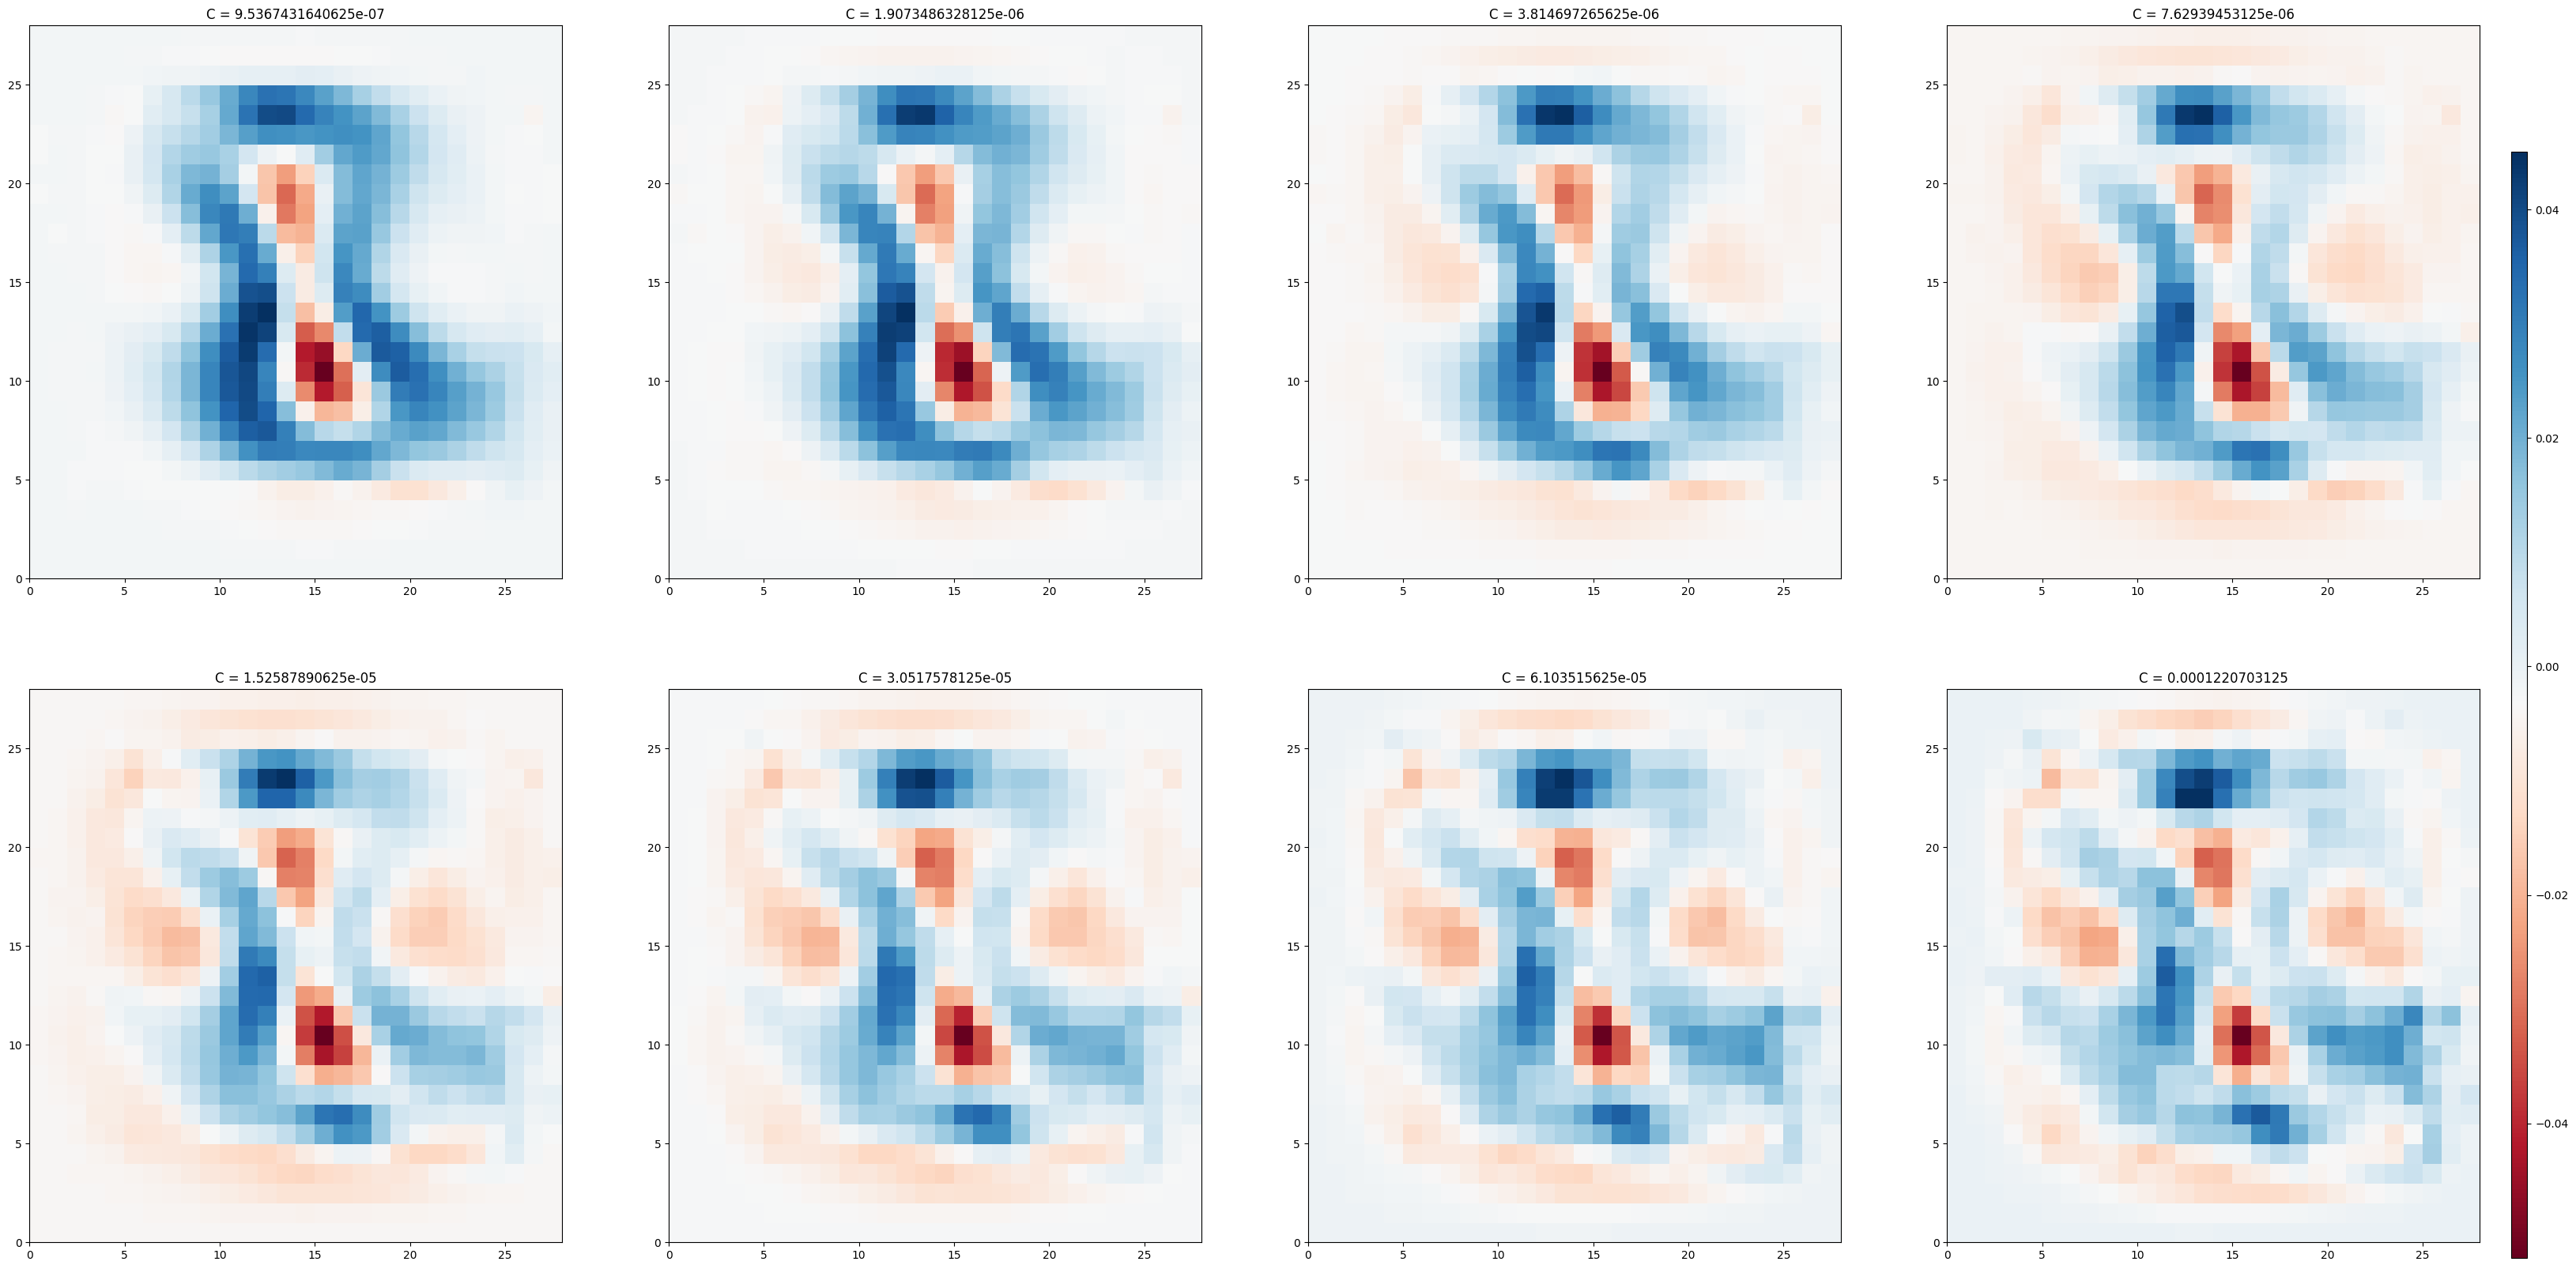

In [ ]:
Num1 = str(1)
Num2 = str(8)

X_filtered = X[(y == Num1) | (y == Num2)]
y_filtered = y[(y == Num1) | (y == Num2)]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Define the C values to use
C_values = [2**i for i in range(-20, -12)]

# Create a new figure
fig = plt.figure(figsize=(40, 20))

for i, C in enumerate(C_values):
    # Train the SVM model
    model = svm.LinearSVC(C=C)
    model.fit(X_train, y_train)

    # Extract the weights of the model
    weights = model.coef_

    # Reshape the weights into a 28x28 matrix
    weights_matrix = weights.reshape(28, 28)

    # Create a subplot for this model
    plt.subplot(2, 4, i+1)

    # Use pcolor to produce a color plot of the matrix
    plt.pcolor(weights_matrix, cmap='RdBu')

    # Add a title to the plot
    plt.title(f'C = {C}')

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.91, 0.1, 0.005, 0.7])

# Add a colorbar to the plot
plt.colorbar(cax=cbar_ax)

# Show the plot
plt.show()